In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# Data Preprocessing:

import cv2 as cv
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score

# Models:

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# A model that I learned by myself: CatBoost + Plotly

# from catboost import CatBoostClassifier


# offline (for plotly)

#import plotly.offline as pyo

# Clustering:

from sklearn.cluster import KMeans

# PCA:

from sklearn.decomposition import PCA

# ICA:

from sklearn.decomposition import FastICA

# Scaling:

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Cross Validation:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [129]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [131]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

In [23]:
def procces_image(img_path):
    img = cv.imread(img_path  )
    img = cv.resize(img , (32,32))

    img = img.reshape(32*32*3)
    img = np.append(img, img.ravel().mean())
    return img

In [24]:
def load_data(path):
    x = []
    y = []

    for file in os.listdir(path):
        label = file.split('.')[0]
        data = procces_image("{}/{}".format(path,file))
        x.append(data)
        y.append(label)
    return x,y

In [25]:
features, targets = load_data('C:\\Users\Selfisher\Desktop\school\DeiScei\Project\catsvdogs')

In [26]:
features = np.asarray(features)
targets = np.asarray(targets)

In [27]:
features.shape

(25000, 3073)

In [28]:
df = pd.DataFrame(features)
df['label'] = targets

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3064,3065,3066,3067,3068,3069,3070,3071,3072,label
0,93.0,171.0,210.0,103.0,181.0,224.0,114.0,192.0,235.0,119.0,...,4.0,4.0,1.0,3.0,3.0,1.0,3.0,3.0,119.620768,cat
1,41.0,37.0,33.0,40.0,42.0,38.0,43.0,43.0,35.0,47.0,...,45.0,62.0,45.0,48.0,66.0,31.0,36.0,51.0,72.590495,cat
2,61.0,55.0,46.0,65.0,58.0,49.0,66.0,59.0,50.0,64.0,...,160.0,162.0,34.0,157.0,169.0,4.0,193.0,194.0,108.319661,cat
3,217.0,222.0,221.0,229.0,229.0,229.0,228.0,228.0,228.0,224.0,...,202.0,202.0,215.0,215.0,214.0,207.0,212.0,215.0,164.578451,cat
4,64.0,100.0,126.0,53.0,92.0,118.0,63.0,104.0,129.0,108.0,...,72.0,86.0,77.0,101.0,116.0,55.0,82.0,94.0,103.436198,cat


In [30]:
features = df.drop(['label'], axis=1)
targets = df['label']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, targets ,random_state = 42)
x_train_train, x_val, y_train_train, y_val = train_test_split(x_train, y_train ,random_state = 7)

In [41]:
y_train.value_counts() # Raughly the same amount of cats and dogs

cat    9391
dog    9359
Name: label, dtype: int64

# Dimension reduction

In [43]:
pca = PCA()
pca.fit(x_train)

PCA()

In [87]:
expl = pd.DataFrame(pca.explained_variance_ratio_*100, columns= ['var_explained'])
expl.head()

,var_explained
0,18.998383
1,10.521264
2,7.209609
3,5.701735
4,3.010888


In [93]:
expl = expl.head(250)

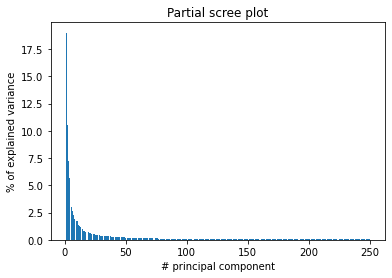

In [111]:
plt.bar(x = range(1, len(expl)+1), height = expl.var_explained)
plt.ylabel('% of explained variance')
plt.xlabel('# principal component')
plt.title('Partial scree plot')
plt.show()

In [102]:
sum(expl.iloc[:50].var_explained)

75.0607724802838

In [120]:
total_explained = []
ind =[]
for i in range(1, 300):
    ind.append(i)
    total_explained.append(sum(expl.iloc[:i].var_explained))

In [121]:
total_explained = pd.DataFrame( total_explained, index = ind, columns = ['var_explained_total'])
total_explained

,var_explained_total
1,18.998383
2,29.519646
3,36.729255
4,42.430991
5,45.441879
...,...
295,88.640355
296,88.640355
297,88.640355
298,88.640355


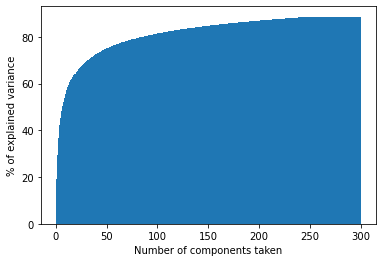

In [124]:
plt.bar(x = range(1, len(total_explained)+1), height = total_explained.var_explained_total, width=1, )
plt.ylabel('% of explained variance')
plt.xlabel('Number of components used')
plt.show()

In [140]:
np.max(total_explained.var_explained_total)

88.64035464495304

In [135]:
pca = PCA(n_components=0.89)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.fit_transform(x_test)

In [138]:
pca.n_components_

244

In [139]:
pca = PCA(n_components=0.85)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.fit_transform(x_test)
pca.n_components_

147

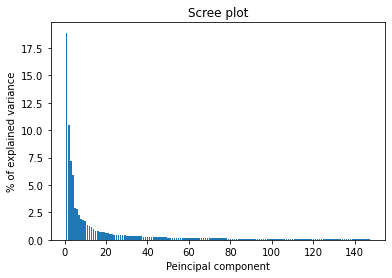

In [143]:
per_var = (pca.explained_variance_ratio_*100)
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.ylabel('% of explained variance')
plt.xlabel('Peincipal component')
plt.title('Scree plot')
plt.show()

### To explain 85% of the variance we only need 147 components

In [148]:
fig = px.scatter_3d(x_train_reduced,
    x=0, y=1, z=2, color = y_train,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})

fig.show()

## Preprocessing
### Now we will reduce our data and scale it down so it's better suitable for most algorithms

In [156]:
preprocessor = Pipeline(([('scaler',StandardScaler()), ('pca',PCA(n_components=0.85))]))
x_train_processed = preprocessor.fit_transform(x_train)

In [157]:
pd.DataFrame(x_train_processed)

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,32.116103,-4.242067,10.534880,32.237813,3.933156,-3.870708,9.926157,12.338024,-3.140245,6.037986,...,-0.197290,1.123880,0.141033,-0.805804,0.452694,0.342981,0.752648,-1.414811,1.264099,-0.090686
1,-9.440407,2.047672,9.406068,-22.751075,9.899042,12.036935,-1.398986,-7.650490,-1.304138,-4.494771,...,-0.353248,1.798115,-1.484575,-1.206999,1.171969,1.644035,-0.214486,-0.547273,-0.335627,-0.061609
2,-7.455281,12.322576,18.746273,-19.014104,4.575312,13.958802,-4.838900,7.405407,-2.463403,-13.885546,...,0.065789,0.655190,2.104908,0.222940,0.607090,-1.112242,0.793961,0.837418,-2.159456,-0.570468
3,-28.361639,-25.195813,2.189069,7.192308,14.815267,-2.393227,-8.465436,-0.316258,-0.923468,-7.714471,...,1.182683,-0.146038,-0.222212,-1.310262,-2.495182,1.069667,2.251653,0.162940,-1.468623,0.961253
4,-9.796369,-2.566132,12.208895,-12.991793,13.602280,9.073410,-18.939721,7.516694,-3.001884,-6.660454,...,-0.362040,-0.569321,0.318068,-1.163787,1.507706,0.790296,0.074267,2.056074,-1.714714,0.818699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,-28.485273,6.699900,-4.941277,-13.995914,13.506104,8.892236,-5.315394,-2.077521,4.234827,8.547305,...,-0.832853,1.685360,1.265527,-1.030833,0.678967,0.973401,-0.174530,0.841144,0.411782,-2.801223
18746,54.337835,-21.794224,1.335331,-10.553979,26.203121,-1.969992,-0.324042,-1.218019,2.330583,-2.575895,...,-0.766008,-1.334849,-0.682611,-0.715735,-1.944163,-0.999382,-0.043297,-1.388513,-0.658132,0.123138
18747,-10.227477,13.726325,-18.732310,-7.894555,-2.985082,3.252982,-4.959526,6.215810,8.600993,-9.163113,...,-0.683685,2.066637,0.410259,0.202514,-0.439205,0.089108,-0.040028,-0.172656,0.658177,0.685152
18748,15.858120,13.908308,5.843841,-2.325497,-4.322653,0.166046,-5.080591,-9.206539,-4.002537,11.970370,...,-2.560753,2.605879,0.833290,-1.093218,0.418870,-1.245166,-1.839935,-0.530950,-1.656346,-0.889152
